### Stochastically Structured Reservoir Computers for Financial and Economic System Identification
Banegas, L. & Vides, F. (2025)

This notebook contains the prototypical algorithms and computational examples described Section 4 in the paper Stochastically Structured Reservoir Computers for Financial and Economic System Identification (2025). Specifically, this Jupyter Notebook includes section 5.2, corresponding to:

1. Computational Example 2: Regional Inflation Network Dynamics.

SSRC consists of a collection of functions written in Python that can be used for stochastically structured reservoir computing for identification and numerical simulation of economic and financial dynamical systems.

The numerical experiments programmed in this notebook use synthetic and real data for stochastically structured reservoir computer based model identification.

#### Computational Simulation: Regional Inflation Network Dynamics

In [3]:
from matplotlib.pyplot import plot, spy, legend, stem,subplot,axis,xlabel,ylabel,grid
from numpy import ones,zeros,where,diag,hstack,min
from TransitionMatrix import TransitionMatrix
from pandas import read_csv, read_excel
from networkx import draw_networkx, DiGraph, circular_layout

In [4]:
def RelGraph(GMatrix):
    GMatrix = GMatrix.T
    nodes = []
    edges = []
    st = []
    tt = []
    for j in range(GMatrix.shape[0]):
        f0 = where(GMatrix[j,:]>0)[0]
        nodes.append(j)
        tt = hstack((tt,f0))
        st = hstack((st,j*ones(len(f0))))

    st = st.astype('int')
    tt = tt.astype('int')
    for k in range(len(st)):
        edges.append((st[k],tt[k]))

    G = DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [5]:
datos_pi_fed = read_excel('Datos Inflación.xlsx',sheet_name='Modelo1').values

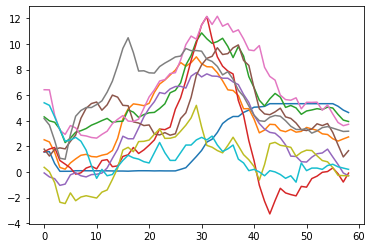

In [6]:
plot(datos_pi_fed[:,2:])

In [7]:
data_pi_fed = datos_pi_fed[:-2,2:]/100
min_data_pi_fed = min(data_pi_fed)
Data_pi_fed = zeros((data_pi_fed.shape[0],data_pi_fed.shape[1]+1))
Data_pi_fed[:,:-1] = data_pi_fed-min_data_pi_fed
Data_pi_fed[:,-1] = 1-sum(data_pi_fed.T)

In [8]:
lista = read_excel('Datos Inflación.xlsx',sheet_name='Modelo1')

In [9]:
lista.columns[2:]

Index(['Tasa de Fondos Federales', 'Inflación  USA', 'Inflación Honduras',
       'Inflación_Costa Rica', 'Inflación_El Salvador', 'Inflación_Guatemala',
       'Inflación_Nicaragua', 'Inflación_República Dominicana',
       'Inflación_Panamá', 'Inflación_China'],
      dtype='object')

In [10]:
SM = zeros((11,11))
SM[0,[0,1]]=1
SM[1,[0,1,9]]=1
SM[2,[0,1,2,4,5]]=1
SM[3,:-1]=1
SM[4,[0,1,2,4,5]]=1
SM[5,[0,1,2,4,5]]=1
SM[6:9,:-1]=1
SM[9,[0,1,9]]=1
SM[10,:]=1

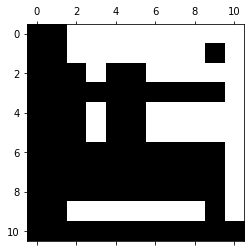

In [11]:
spy(SM)

In [12]:
A_pi_fed_est = TransitionMatrix(Data_pi_fed.T,sample_size=30,SM=SM,error = 1e-7,nz = 11*11)

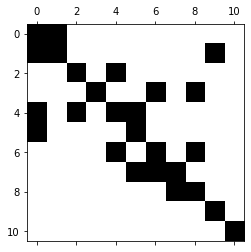

In [13]:
spy(A_pi_fed_est)

In [14]:
sum(A_pi_fed_est)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<StemContainer object of 3 artists>

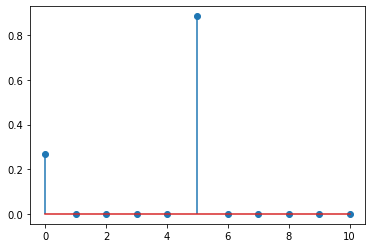

In [15]:
stem(A_pi_fed_est[5,:])

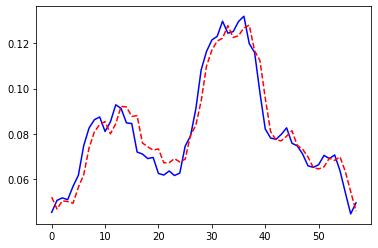

In [16]:
k = 5;plot(Data_pi_fed[1:,k],'b');plot((Data_pi_fed[:-1,:]@A_pi_fed_est)[:,k],'r--')

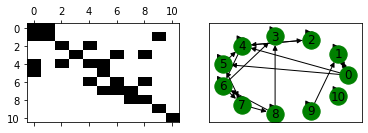

In [17]:
G = RelGraph(A_pi_fed_est)
subplot(2,2,1),spy(A_pi_fed_est),axis('tight');
pos = circular_layout(G)
subplot(2,2,2),draw_networkx(G,node_color = 'green',pos = pos),axis('tight');

Text(0.5, 0, 't (months)')

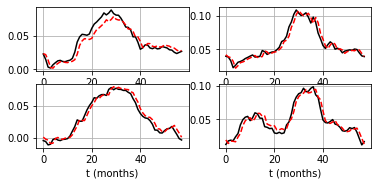

In [18]:
signals_list = [1,2,4,5]
for j in range(4):
    subplot(3,2,j+1)
    plot(data_pi_fed[1:,signals_list[j]],'k')
    plot((Data_pi_fed[:-1,:] @ A_pi_fed_est)[:,signals_list[j]] + min_data_pi_fed,'r--')
    grid(True)
    xlabel('t (months)')

subplot(3,2,4)
xlabel('t (months)')


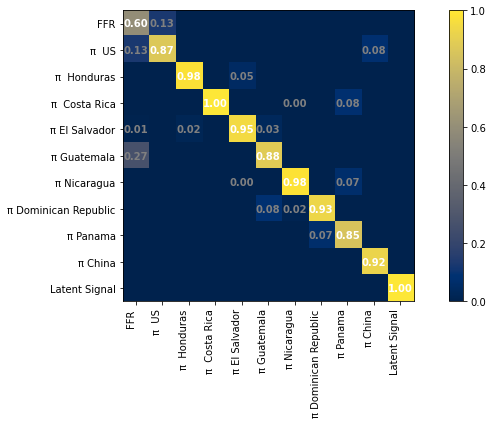

In [19]:
import numpy as np
import matplotlib.pyplot as plt


nombres = [ 
    "FFR",
    "π  US", 
    "π  Honduras", 
    "π  Costa Rica", 
    "π El Salvador", 
    "π Guatemala", 
    "π Nicaragua", 
    "π Dominican Republic", 
    "π Panama", 
    "π China", 
    "Latent Signal"
]

fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(A_pi_fed_est, cmap='cividis', interpolation='nearest')


for i in range(A_pi_fed_est.shape[0]):
    for j in range(A_pi_fed_est.shape[1]):
        value = A_pi_fed_est[i, j]
        if value != 0: 
            text_color = 'white' if value > 0.5 else 'gray'  
            ax.text(j, i, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=10, weight='bold')

ax.set_xticks(np.arange(A_pi_fed_est.shape[1]))  
ax.set_yticks(np.arange(A_pi_fed_est.shape[0]))  

ax.set_xticklabels(nombres, rotation=90, ha='right', fontsize=10, weight='normal', color='black')  
ax.set_yticklabels(nombres, fontsize=10, weight='normal', color='black') 

plt.title("", fontsize=10, weight='bold', color='black')
plt.colorbar(cax)  

plt.tight_layout()
plt.show()


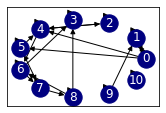

In [20]:
G = RelGraph(A_pi_fed_est)
pos = circular_layout(G)
subplot(2,2,2),draw_networkx(G,node_color = 'navy',pos = pos, font_color='white'),axis('tight');

# References
1. Banegas, L., Vides. F. Stochastically Structured Reservoir Computers for Financial and Economic System Identification. arXiv:2507.17115 [math.OC]
2. Vides, F., Nogueira, I., Lopez Gutierrez, G., Banegas, L., Flores, E. (2025). Identifying Systems with Symmetries using Equivariant Autoregressive Reservoir Computers. arXiv:2311.09511 [eess.SY]